In [1]:
import pandas as pd
import os
import shutil
print(os.listdir("./Datasets/Chest X-Ray"))

['normaltest.png', 'Prediction', 'testcovid.png', 'Train', 'Val']


In [2]:
TRAIN_PATH = "./Datasets/Chest X-Ray/Train"
VAL_PATH = "./Datasets/Chest X-Ray/Val"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [4]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(180,180,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (180,180),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
validation_generator = test_dataset.flow_from_directory(
    VAL_PATH,
    target_size = (180,180),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [10]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

C:\Users\Archangel\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 12s 1s/step - loss: 0.6881 - accuracy: 0.5586 - val_loss: 0.6745 - val_accuracy: 0.6833
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.6488 - accuracy: 0.6797 - val_loss: 0.5506 - val_accuracy: 0.6500
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.4363 - accuracy: 0.8320 - val_loss: 0.2075 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.3001 - accuracy: 0.8984 - val_loss: 0.1272 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.2414 - accuracy: 0.9023 - val_loss: 0.1190 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.2734 - accuracy: 0.8750 - val_loss: 0.0858 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.1384 - accuracy: 0.9609 - val_loss: 0.0864 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==================

In [11]:
model.save("COVID Detection.h5")

In [12]:
model = load_model("COVID Detection.h5")

In [30]:
import numpy as np
import cv2
from keras.preprocessing import image

def predict_image(model, img_path, img_dims = 180):
    img = image.load_img(img_path, target_size = (img_dims, img_dims))
    plt.imshow(img)
    plt.show()
    img = image.img_to_array(img)
    x = np.expand_dims(img, axis=0) * 1./255
    score = model.predict(x)
    labels = (score < 0.5).astype(np.int)
    print('Negatif COVID-19' if labels[0][0] == 0 else 'Positif COVID-19')
    print('Probabilitas: %', (float)(score * 100) if labels[0][0] == 0 else (float)(100-(score * 100)))

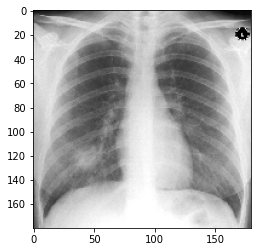

Positif COVID-19
Probabilitas: % 99.90281677246094


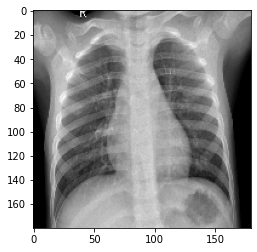

Negatif COVID-19
Probabilitas: % 93.33072662353516


In [31]:

predict_image(model,('./Datasets/Chest X-Ray/Prediction/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg'))
predict_image(model,('./Datasets/Chest X-Ray/Prediction/NORMAL2-IM-0339-0001.jpeg'))